# Music genre classification notebook

## Importing Libraries

In [1]:
# feature extracting and preprocessing data
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from PIL import Image
import pathlib
import csv

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

#Keras
# import tensorflow
# import keras
import pickle
import warnings
warnings.filterwarnings('ignore')

## Extracting music and features

### Dataset

We use [GTZAN genre collection](http://marsyasweb.appspot.com/download/data_sets/) and Indian Music Genre dataset for classification. 
<br>
<br>
The GTZAN dataset consists of 10 genres i.e
 * Blues
 * Classical
 * Country
 * Disco
 * Hiphop
 * Jazz
 * Metal
 * Pop
 * Reggae
 * Rock

And the Indian Music Genre dataset consists of 5 genres i.e.
 * Bollypop
 * Ghazal
 * Sufi
 * Semiclassical
 * Carnatic

Each genre contains 100 songs. Total dataset: 1500 songs

## Extracting the Spectrogram for every Audio

In [ ]:
cmap = plt.get_cmap('inferno')

plt.figure(figsize=(10,10))
genres = 'blues bollypop carnatic classical country disco ghazal hiphop jazz metal pop reggae rock semiclassical sufi'.split()
for g in genres:
    pathlib.Path(f'img_data/{g}').mkdir(parents=True, exist_ok=True)     
    for filename in os.listdir(f'./genres/{g}'):
        songname = f'./genres/{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=5)
        plt.specgram(y, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap=cmap, sides='default', mode='default', scale='dB');
        plt.axis('off');
        plt.savefig(f'img_data/{g}/{filename[:-3].replace(".", "")}.png')
        plt.clf()
 


KeyboardInterrupt



Error in callback <function flush_figures at 0x0000014B7300E310> (for post_execute):


All the audio files get converted into their respective spectrograms. We can now easily extract features from them.

## Extracting features from Spectrogram


We will extract

* Mel-frequency cepstral coefficients (MFCC)(20 in number)
* Spectral Centroid,
* Zero Crossing Rate
* Chroma Frequencies
* Spectral Roll-off.

In [ ]:
header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()

## Writing data to csv file

We write the data to a csv file 

In [ ]:
file = open('data.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
genres = 'blues bollypop carnatic classical country disco ghazal hiphop jazz metal pop reggae rock semiclassical sufi'.split()
for g in genres:
    for filename in os.listdir(f'./genres/{g}'):
        songname = f'./genres/{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=30)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        rmse = np.sqrt(librosa.feature.rms(y=y))
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        to_append = f'{filename}  {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        to_append += f' {g}'
        file = open('data.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())

The data has been extracted into a data.csv file.

# Analysing the Data in Pandas

In [5]:
data = pd.read_csv('C:\\Users\\Franklin David\\Downloads\\data.csv')
data.head()

,filename,tempo,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00000.wav,123.046875,0.349943,0.353032,1784.420446,2002.650192,3806.485316,0.083066,-113.596748,121.557297,...,8.810669,-3.667368,5.751691,-5.162763,0.750948,-1.691938,-0.409953,-2.300209,1.219929,blues
1,blues.00001.wav,67.999589,0.340983,0.297381,1529.835316,2038.617579,3548.820207,0.056044,-207.556793,124.006721,...,5.376803,-2.239120,4.216963,-6.012273,0.936109,-0.716537,0.293876,-0.287431,0.531573,blues
2,blues.00002.wav,161.499023,0.363603,0.414141,1552.481958,1747.165985,3040.514948,0.076301,-90.754387,140.459900,...,5.789265,-8.905224,-1.083720,-9.218359,2.455806,-7.726901,-1.815723,-3.433434,-2.226821,blues
3,blues.00003.wav,63.024009,0.404779,0.358998,1070.119953,1596.333948,2185.028454,0.033309,-199.431152,150.099213,...,6.087676,-2.476421,-1.073890,-2.874778,0.780977,-3.316932,0.637982,-0.619690,-3.408233,blues
4,blues.00004.wav,135.999178,0.308590,0.291960,1835.494603,1748.362448,3580.945013,0.101500,-160.266037,126.198807,...,-2.806383,-6.934123,-7.558618,-9.173553,-4.512165,-5.453538,-0.924161,-4.409333,-11.703781,blues


In [3]:
data.shape

(1499, 29)

In [7]:
%matplotlib notebook
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
data['label'] = data['label'].astype('category')
data['class_label'] = data['label'].cat.codes
X = data.iloc[:,1:28]
y = data['class_label']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=3)

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
# we must apply the scaling to the test set that we computed for the training set
X_test_scaled = scaler.transform(X_test)

In [4]:
# Dropping unnecessary columns
data = data.drop(['filename'],axis=1)

## Encoding the Labels

In [8]:
genre_list = data.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)

## Scaling the Feature columns

In [9]:
scaler = StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))

In [9]:
lookup_genre_name = {0:'blues',1:'bollypop',2:'carnatic',3:'classical',4:'country',
                     5:'disco',6:'ghazal',7:'hiphop',8:'jazz',9:'metal', 10:'pop',
                     11:'reggae',12:'rock',13:'semiclassical',14:'sufi'}   
lookup_genre_name

{0: 'blues',
 1: 'bollypop',
 2: 'carnatic',
 3: 'classical',
 4: 'country',
 5: 'disco',
 6: 'ghazal',
 7: 'hiphop',
 8: 'jazz',
 9: 'metal',
 10: 'pop',
 11: 'reggae',
 12: 'rock',
 13: 'semiclassical',
 14: 'sufi'}

## Dividing data into training and Testing set

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
len(y_train)

1199

In [13]:
len(y_test)

300

In [14]:
X_train[10]

array([-1.08134942, -0.53123043, -0.16638579, -1.43135806, -1.38542051,
       -1.54129445, -1.14436556, -0.33254268,  1.96278703, -0.41909478,
       -0.14020169,  0.78185361, -1.70076751,  0.00802416, -0.788509  ,
       -0.09689792, -1.24068266,  1.08945061, -1.23546563, -0.16917704,
        0.363867  , -0.16040787, -0.96964014, -0.20422944, -0.78361242,
        0.60818569, -0.26177049])

# Classification with Keras

## Building our Network

In [35]:
from keras import models
from keras import layers

model = models.Sequential([
layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
layers.Dropout(0.2),
layers.Dense(128, activation='relu'),
layers.Dropout(0.2),
layers.Dense(64, activation='relu'),
layers.Dropout(0.2),
layers.Dense(15, activation='softmax'),
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 256)               7168      
                                                                 
 dropout_9 (Dropout)         (None, 256)               0         
                                                                 
 dense_13 (Dense)            (None, 128)               32896     
                                                                 
 dropout_10 (Dropout)        (None, 128)               0         
                                                                 
 dense_14 (Dense)            (None, 64)                8256      
                                                                 
 dropout_11 (Dropout)        (None, 64)                0         
                                                                 
 dense_15 (Dense)            (None, 15)               

In [36]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [37]:
history = model.fit(X_train,
                    y_train,
                    epochs=300,
                    batch_size=128)
                   

Epoch 1/300
10/10 [==============================] - 1s 7ms/step - loss: 2.6148 - accuracy: 0.1326
Epoch 2/300
10/10 [==============================] - 0s 8ms/step - loss: 2.3412 - accuracy: 0.2560
Epoch 3/300
10/10 [==============================] - 0s 7ms/step - loss: 2.1190 - accuracy: 0.3369
Epoch 4/300
10/10 [==============================] - 0s 7ms/step - loss: 1.9094 - accuracy: 0.3903
Epoch 5/300
10/10 [==============================] - 0s 8ms/step - loss: 1.7333 - accuracy: 0.4362
Epoch 6/300
10/10 [==============================] - 0s 9ms/step - loss: 1.6363 - accuracy: 0.4537
Epoch 7/300
10/10 [==============================] - 0s 10ms/step - loss: 1.5072 - accuracy: 0.5054
Epoch 8/300
10/10 [==============================] - 0s 9ms/step - loss: 1.4598 - accuracy: 0.5113
Epoch 9/300
10/10 [==============================] - 0s 9ms/step - loss: 1.3830 - accuracy: 0.5379
Epoch 10/300
10/10 [==============================] - 0s 10ms/step - loss: 1.2943 - accuracy: 0.5488
Epoch 1

Epoch 163/300
10/10 [==============================] - 0s 9ms/step - loss: 0.1296 - accuracy: 0.9641
Epoch 164/300
10/10 [==============================] - 0s 9ms/step - loss: 0.1328 - accuracy: 0.9625
Epoch 165/300
10/10 [==============================] - 0s 8ms/step - loss: 0.1463 - accuracy: 0.9525
Epoch 166/300
10/10 [==============================] - 0s 8ms/step - loss: 0.1583 - accuracy: 0.9475
Epoch 167/300
10/10 [==============================] - 0s 7ms/step - loss: 0.1431 - accuracy: 0.9491
Epoch 168/300
10/10 [==============================] - 0s 8ms/step - loss: 0.1237 - accuracy: 0.9566
Epoch 169/300
10/10 [==============================] - 0s 7ms/step - loss: 0.1306 - accuracy: 0.9533
Epoch 170/300
10/10 [==============================] - 0s 7ms/step - loss: 0.1479 - accuracy: 0.9550
Epoch 171/300
10/10 [==============================] - 0s 7ms/step - loss: 0.1375 - accuracy: 0.9516
Epoch 172/300
10/10 [==============================] - 0s 7ms/step - loss: 0.1188 - accurac

10/10 [==============================] - 0s 7ms/step - loss: 0.0988 - accuracy: 0.9675
Epoch 245/300
10/10 [==============================] - 0s 8ms/step - loss: 0.0749 - accuracy: 0.9791
Epoch 246/300
10/10 [==============================] - 0s 6ms/step - loss: 0.0844 - accuracy: 0.9675
Epoch 247/300
10/10 [==============================] - 0s 7ms/step - loss: 0.0781 - accuracy: 0.9750
Epoch 248/300
10/10 [==============================] - 0s 7ms/step - loss: 0.0669 - accuracy: 0.9817
Epoch 249/300
10/10 [==============================] - 0s 7ms/step - loss: 0.0955 - accuracy: 0.9725
Epoch 250/300
10/10 [==============================] - 0s 7ms/step - loss: 0.0940 - accuracy: 0.9666
Epoch 251/300
10/10 [==============================] - 0s 7ms/step - loss: 0.0840 - accuracy: 0.9741
Epoch 252/300
10/10 [==============================] - 0s 8ms/step - loss: 0.0825 - accuracy: 0.9683
Epoch 253/300
10/10 [==============================] - 0s 8ms/step - loss: 0.0737 - accuracy: 0.9783
Epoc

In [38]:
test_loss, test_acc = model.evaluate(X_test,y_test)

10/10 [==============================] - 0s 3ms/step - loss: 1.4508 - accuracy: 0.6800


In [39]:
print('Test loss: ',test_loss)
print('Test accuracy: ',test_acc)

Test loss:  1.4507851600646973
Test accuracy:  0.6800000071525574


## Validating our approach
Let's set apart 300 samples in our training data to use as a validation set:

In [40]:
x_val = X_train[:300]
partial_x_train = X_train[300:]

y_val = y_train[:300]
partial_y_train = y_train[300:]

Now let's train our network for 80 epochs:

In [50]:
model = models.Sequential([
layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
layers.Dropout(0.2),
layers.Dense(256, activation='relu'),
layers.Dropout(0.2),
layers.Dense(128, activation='relu'),
layers.Dropout(0.2),
layers.Dense(64, activation='relu'),
layers.Dropout(0.2),
layers.Dense(15, activation='softmax'),
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

trains = model.fit(partial_x_train,
          partial_y_train,
          epochs=200,
          batch_size=128,
          validation_data=(x_val, y_val),
          shuffle = True,
         )
results = model.evaluate(X_test, y_test)

Epoch 1/200
8/8 [==============================] - 2s 53ms/step - loss: 2.6261 - accuracy: 0.1491 - val_loss: 2.3901 - val_accuracy: 0.3567
Epoch 2/200
8/8 [==============================] - 0s 17ms/step - loss: 2.3551 - accuracy: 0.2636 - val_loss: 2.0967 - val_accuracy: 0.3833
Epoch 3/200
8/8 [==============================] - 0s 19ms/step - loss: 2.1148 - accuracy: 0.3348 - val_loss: 1.8192 - val_accuracy: 0.4433
Epoch 4/200
8/8 [==============================] - 0s 18ms/step - loss: 1.9044 - accuracy: 0.3737 - val_loss: 1.6209 - val_accuracy: 0.4900
Epoch 5/200
8/8 [==============================] - 0s 19ms/step - loss: 1.7964 - accuracy: 0.3626 - val_loss: 1.5177 - val_accuracy: 0.4833
Epoch 6/200
8/8 [==============================] - 0s 19ms/step - loss: 1.6822 - accuracy: 0.4216 - val_loss: 1.4429 - val_accuracy: 0.4900
Epoch 7/200
8/8 [==============================] - 0s 19ms/step - loss: 1.6084 - accuracy: 0.4549 - val_loss: 1.3831 - val_accuracy: 0.5333
Epoch 8/200
8/8 [===

8/8 [==============================] - 0s 23ms/step - loss: 0.2575 - accuracy: 0.9155 - val_loss: 1.4132 - val_accuracy: 0.6733
Epoch 118/200
8/8 [==============================] - 0s 21ms/step - loss: 0.2478 - accuracy: 0.9110 - val_loss: 1.5440 - val_accuracy: 0.6533
Epoch 119/200
8/8 [==============================] - 0s 18ms/step - loss: 0.2656 - accuracy: 0.9199 - val_loss: 1.3492 - val_accuracy: 0.6800
Epoch 120/200
8/8 [==============================] - 0s 19ms/step - loss: 0.2277 - accuracy: 0.9310 - val_loss: 1.4437 - val_accuracy: 0.6500
Epoch 121/200
8/8 [==============================] - 0s 20ms/step - loss: 0.2134 - accuracy: 0.9310 - val_loss: 1.3158 - val_accuracy: 0.6633
Epoch 122/200
8/8 [==============================] - 0s 20ms/step - loss: 0.2106 - accuracy: 0.9344 - val_loss: 1.3531 - val_accuracy: 0.6700
Epoch 123/200
8/8 [==============================] - 0s 20ms/step - loss: 0.2186 - accuracy: 0.9321 - val_loss: 1.4093 - val_accuracy: 0.6700
Epoch 124/200
8/8 [=

Epoch 175/200
8/8 [==============================] - 0s 21ms/step - loss: 0.1843 - accuracy: 0.9422 - val_loss: 1.4797 - val_accuracy: 0.6700
Epoch 176/200
8/8 [==============================] - 0s 26ms/step - loss: 0.1556 - accuracy: 0.9499 - val_loss: 1.4495 - val_accuracy: 0.6800
Epoch 177/200
8/8 [==============================] - 0s 25ms/step - loss: 0.1506 - accuracy: 0.9466 - val_loss: 1.4284 - val_accuracy: 0.6967
Epoch 178/200
8/8 [==============================] - 0s 21ms/step - loss: 0.1348 - accuracy: 0.9600 - val_loss: 1.4179 - val_accuracy: 0.6933
Epoch 179/200
8/8 [==============================] - 0s 19ms/step - loss: 0.1257 - accuracy: 0.9555 - val_loss: 1.4539 - val_accuracy: 0.6767
Epoch 180/200
8/8 [==============================] - 0s 19ms/step - loss: 0.1472 - accuracy: 0.9544 - val_loss: 1.5596 - val_accuracy: 0.6900
Epoch 181/200
8/8 [==============================] - 0s 18ms/step - loss: 0.4854 - accuracy: 0.9110 - val_loss: 1.6431 - val_accuracy: 0.6700
Epoch 

In [51]:
#training data loss, accuracy
results

[1.5344949960708618, 0.6633333563804626]

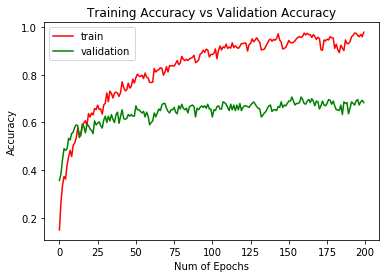

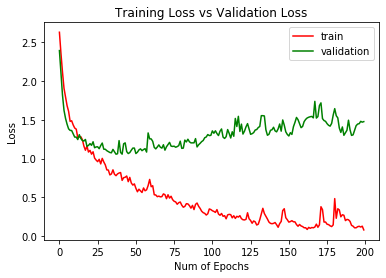

In [52]:
plt.figure(0)
plt.plot(trains.history['accuracy'],'r')
plt.plot(trains.history['val_accuracy'],'g')
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])
 
plt.figure(1)
plt.plot(trains.history['loss'],'r')
plt.plot(trains.history['val_loss'],'g')
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])
 
plt.show()

## Predictions on Test Data

In [53]:
predictions = model.predict(X_test)

10/10 [==============================] - 0s 6ms/step


In [54]:
predictions[0].shape

(15,)

In [55]:
np.sum(predictions[0])

1.0

In [56]:
df = pd.DataFrame()
df["predictions"] = np.argmax(predictions,axis=1)
df["actual labels"] = y_test

df

,predictions,actual labels
0,11,11
1,13,13
2,4,4
3,8,4
4,4,4
...,...,...
295,9,9
296,7,7
297,2,13
298,11,11


In [74]:
pick1 = {
    'norma':scaler,
    'model':model,
    'lgn':lookup_genre_name
}
pickle.dump(pick1, open('model1.p', 'wb'))

In [ ]:
pickled_model = pickle.load(open('model1.p', 'rb'))
print(pickled_model)

Keras model archive loading:
File Name                                             Modified             Size
metadata.json                                  2023-03-23 19:23:28           64
variables.h5                                   2023-03-23 19:23:30      2285416
config.json                                    2023-03-23 19:23:28         2700
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
......dense_3
.........vars
............0
............1
......dense_4
.........vars
............0
............1
...metrics
......mean
.........vars
............0
............1
......mean_metric_wrapper
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19